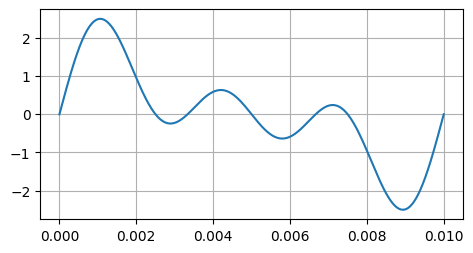

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

f1 = 100
f2 = 200
f3 = 300
fs = 4000

t1 = np.arange(0, 0.01, 1/fs)

sinc_arr1 = np.sin(2*np.pi*f1*t1)
sinc_arr2 = np.sin(2*np.pi*f2*t1)
sinc_arr3 = np.sin(2*np.pi*f3*t1)

# Multitone frequency
sin_func = sinc_arr1 + sinc_arr2 + sinc_arr3

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t1, sin_func)
ax1.grid(True)

## Power Spectrum

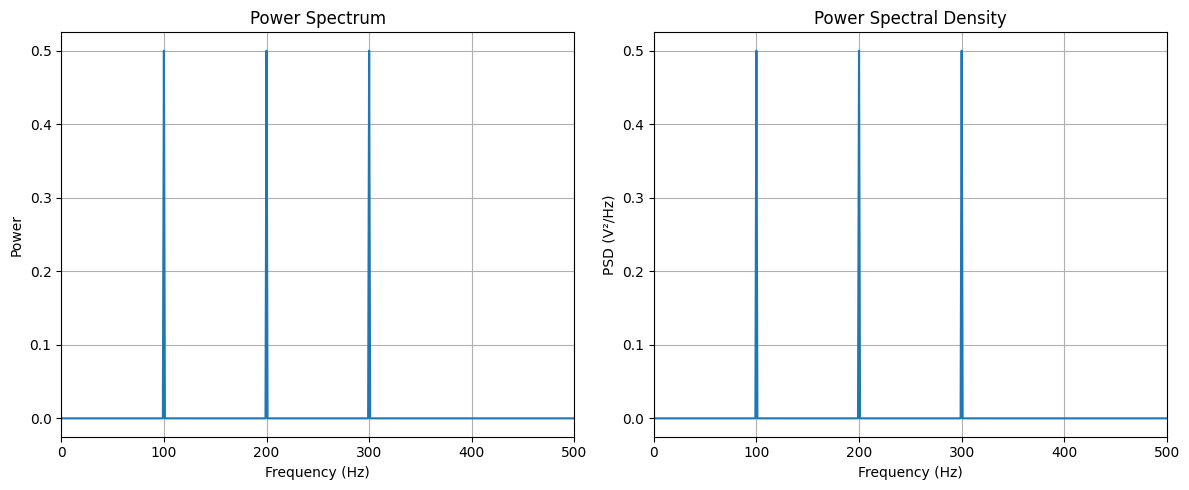

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 4000
f = [100, 200, 300]
t = np.arange(0, 1, 1/fs)
x = np.sum([np.sin(2*np.pi*fi*t) for fi in f], axis=0)
N = len(x)

# FFT (rfft for positive frequencies only)
X = np.fft.rfft(x)
freq = np.fft.rfftfreq(N, 1/fs)

# Power spectrum (corrected)
power = (np.abs(X)**2) / N**2
power[1:-1] *= 2  

# PSD
psd = power / (fs / N)

# Plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(freq, power)
plt.title("Power Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim(0, 500)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(freq, psd)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.xlim(0, 500)
plt.grid(True)

plt.tight_layout()
plt.show()

## Modulation 

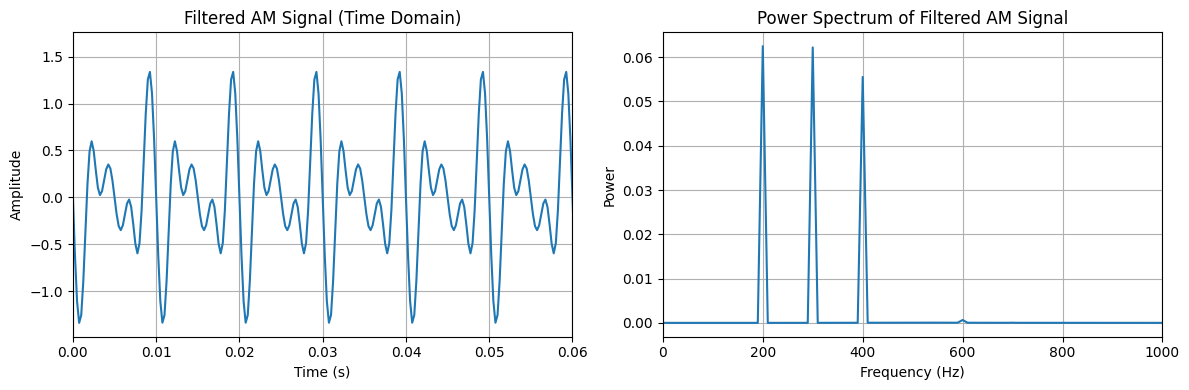

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 4000
t = np.arange(0, 0.1, 1/fs)  # short interval for plotting

# Original signal (sum of sinusoids)
f1, f2, f3 = 100, 200, 300
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# Carrier
fc = 500
carrier = np.cos(2*np.pi*fc*t)

# Modulated signal
modulated = carrier * x
modulated = filtfilt(b, a, modulated)

# FFT of modulated signal
N = len(modulated)
modulated_fft = np.fft.fft(modulated)
freq = np.fft.fftfreq(N, d=1/fs)
pos = freq >= 0
power = (np.abs(modulated_fft[pos]) / N)**2

# Plot both graphs side by side
plt.figure(figsize=(12,4))

# Time-domain signal
plt.subplot(1,2,1)
plt.plot(t, modulated)
plt.title("Modulated Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([0, 0.06])
plt.grid(True)

# Frequency-domain signal
plt.subplot(1,2,2)
plt.plot(freq[pos], power)
plt.title("Power Spectrum of Modulated Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim([0, 1000])
plt.grid(True)

plt.tight_layout()
plt.show()


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


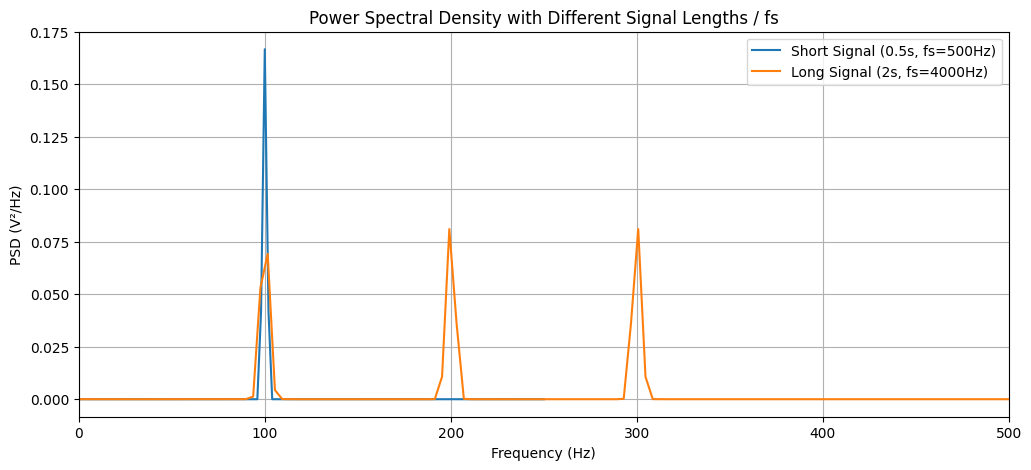

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# -----------------------------
# Signal parameters
# -----------------------------
f1, f2, f3 = 100, 200, 300  # Signal frequencies

# Case 1: Short signal, lower sampling frequency
fs1 = 500
t1 = np.arange(0, 0.5, 1/fs1)  # 0.5 sec
x1 = np.sin(2*np.pi*f1*t1) + np.sin(2*np.pi*f2*t1) + np.sin(2*np.pi*f3*t1)

# Case 2: Long signal, higher sampling frequency
fs2 = 4000
t2 = np.arange(0, 2, 1/fs2)  # 2 sec
x2 = np.sin(2*np.pi*f1*t2) + np.sin(2*np.pi*f2*t2) + np.sin(2*np.pi*f3*t2)

# -----------------------------
# Compute PSD using Welch method
# -----------------------------
f_short, psd_short = welch(x1, fs1, nperseg=256)
f_long, psd_long = welch(x2, fs2, nperseg=1024)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(12,5))

plt.plot(f_short, psd_short, label='Short Signal (0.5s, fs=500Hz)')
plt.plot(f_long, psd_long, label='Long Signal (2s, fs=4000Hz)')
plt.title("Power Spectral Density with Different Signal Lengths / fs")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.xlim(0, 500)
plt.grid(True)
plt.legend()
plt.show()
